 4. (8 points) [LIFE IN LOWER DIMENSIONS...] You are provided with a dataset of 1797 images in a
folder here - each image is 8x8 pixels and provided as a feature vector of length 64. You will try
your hands at transforming this dataset to a lower-dimensional space, and clustering the images in
this reduced space.
Please use the template.ipynb file in the same folder to prepare your solution. Provide your re-
sults/answers in the pdf file you upload to Crowdmark, and submit your code separately in this
moodle link. The code submitted should be a rollno.zip file containing two files: rollno.ipynb file
(including your code as well as the exact same results/plots uploaded to Crowdmark) and the
associated rollno.py file.
Write the code from scratch for both PCA and clustering. The only exception is the computation of
eigenvalues and eigenvectors for which you could use the numpy in-bulit function.
(a) (4 points) Run the PCA algorithm on the given dataset. Plot the cumulative percentage vari-
ance explained by the principal components. Report the number of principal components that
contribute to 90% of the variance in the dataset.
(b) (4 points) Perform reconstruction of data using the small number of components: [2,4,8,16].
Report the Mean Square Error (MSE) between the original data and reconstructed data, and
interpret the optimal dimension ̂ d based on the MSE values.


## Import required Header File 

In [2]:
import numpy as np
import pandas as pd
from numpy import load
from matplotlib import pyplot as plt

## Loading of Dataset

In [3]:
data = load('Data.npz')
keys = data.keys()
images = data['arr_0']
#print(images.shape)

## Printing Some dataset value

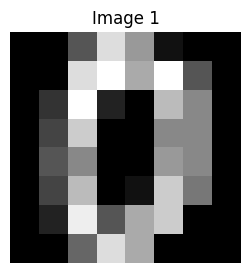

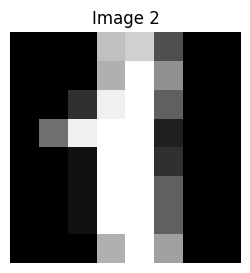

In [4]:

num_images_to_plot = 2

# Loop through and plot the images
for i in range(num_images_to_plot):
    # Reshape the flat vector to 8x8
    image = images[i].reshape(8, 8)
    
    plt.figure(figsize=(3, 3))  # Adjust the figsize as needed
    plt.imshow(image, cmap='gray')  # Assuming the images are grayscale
    plt.title(f'Image {i+1}')
    plt.axis('off')
    plt.show()


## Function for Mean, Covariance and PCA

In [5]:
def Mean(data):
    data_point = data.shape[0]
    features = data.shape[1]

    mean =np.zeros(features)

    for i in range(features):
        sum=0
        for j in range(data_point):
            sum=sum+data[j][i]
        mean[i]=sum/data_point

    return mean


def covariance_matrix(data):
    
    data_point = data.shape[0]
    features = data.shape[1]
    mean=Mean(data)
    covariance=np.zeros((features,features))
    for i in range(features):
        for j in range(features):
            for k in range(data_point):
                covariance[i][j] += (data[k][i] - mean[i]) * (data[k][j] - mean[j])
            covariance[i][j]/=(data_point-1)

    return covariance




def PCA(data):
    
    mean=Mean(data);
    data_mean_subtracted= data-mean

    covariance = covariance_matrix(data_mean_subtracted)
    
    
    eigenvalues , eigenvectors = np.linalg.eigh(covariance)
     
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalue = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:,sorted_index]
    
    explained_variance_ratio=sorted_eigenvalue/ np.sum(sorted_eigenvalue)
    
    
    sum=0 # contains cumalative variance 
    PCs=0 # Contains Number of PC which having cumalative variance is more than 90%
    for i in explained_variance_ratio:
        sum+=i
        PCs+=1
        if(sum>=0.90):
            break
            
            
    return covariance,explained_variance_ratio,PCs
    
    
    

## Calculating the covariance , variance ratio and PCA

In [6]:
covariance,explained_variance_ratio , PCs =  PCA(images)

## Solution of Part (a)

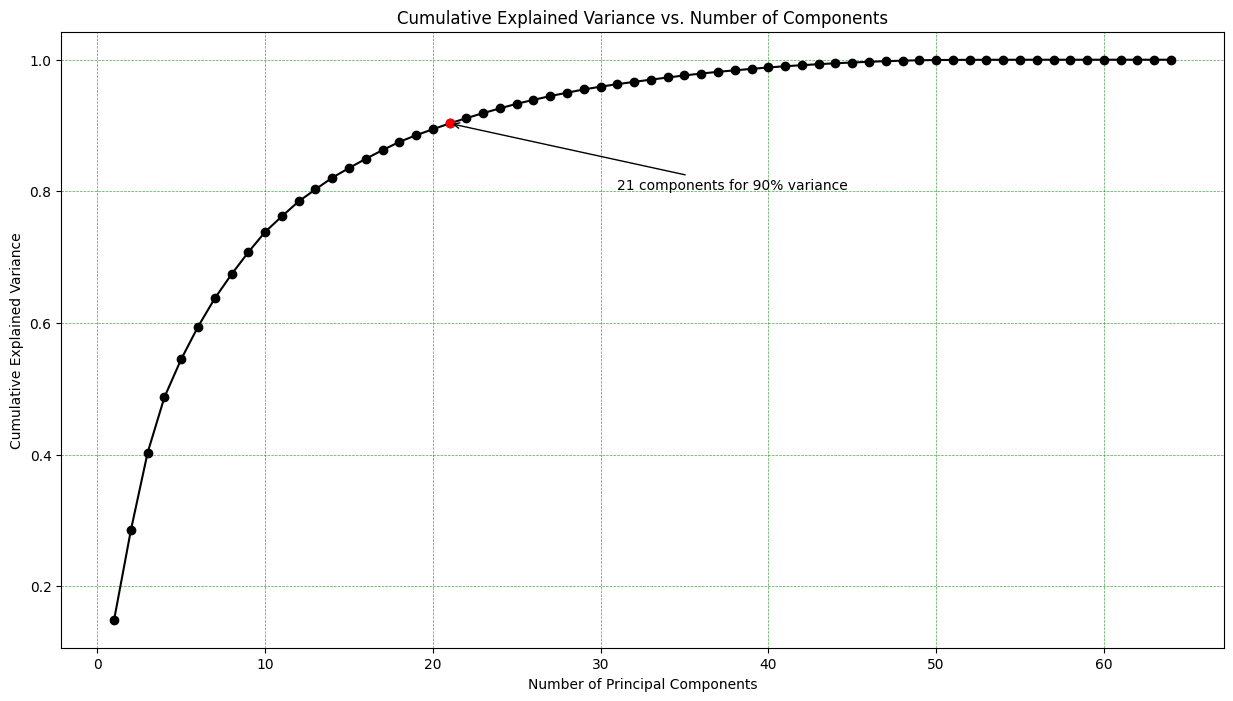

The number of principal components that contribute to 90% of the variance is: 21


In [7]:
#Solution 1

cumulative_explained_variance=[]
sum=0
for i in explained_variance_ratio:
    sum=sum+i
    cumulative_explained_variance.append(sum)

# Plot cumulative explained variance
component_numbers = range(1, len(cumulative_explained_variance) + 1)
plt.figure(figsize=(15,8))
plt.plot(component_numbers,cumulative_explained_variance,marker='o', linestyle='-', color='black')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')


plt.plot(PCs, cumulative_explained_variance[PCs-1], 'ro')
plt.annotate(f'{PCs} components for 90% variance',
             xy=(PCs, cumulative_explained_variance[PCs-1]),
             xytext=(PCs + 10, cumulative_explained_variance[PCs-1] - 0.1),
             arrowprops=dict(arrowstyle='->'))
plt.grid(color='green', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


print(f"The number of principal components that contribute to 90% of the variance is: {PCs}")

## Solution of Part (b)

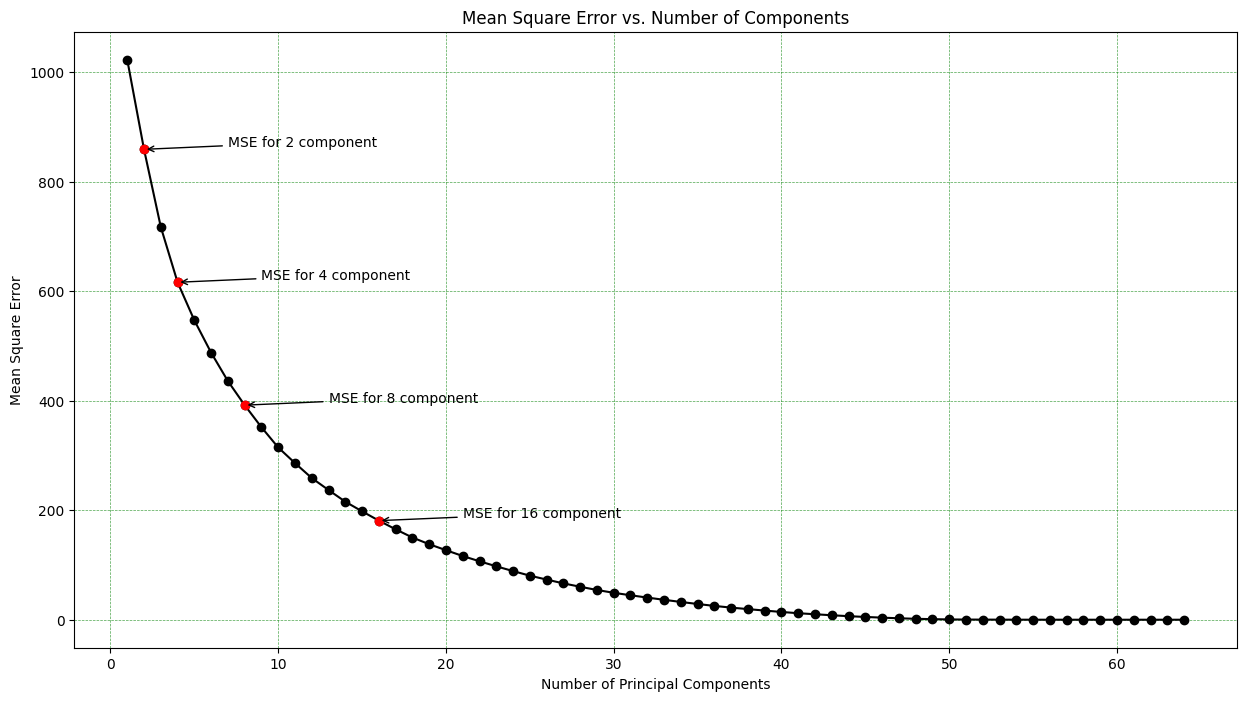

MSE for d=2: 858.9447808487271
MSE for d=4: 616.191130056277
MSE for d=8: 391.7947361149742
MSE for d=16: 180.93970325737757
The optimal dimension is 16 based on MSE values.


In [9]:

def reconstruct_data(data_mean_subtracted, num_components,sorted_eigenvectors,mean):
    
    M_Eigenvectors=sorted_eigenvectors[:,:num_components]
    reconstructed_data=np.dot(np.dot(data_mean_subtracted, M_Eigenvectors),M_Eigenvectors.T) 
    reconstructed_data=reconstructed_data+mean
    
    return reconstructed_data







mean=Mean(images);
data_mean_subtracted= images-mean

#covariance = covariance_matrix(data_mean_subtracted)
eigenvalues , eigenvectors = np.linalg.eigh(covariance)


sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalue = eigenvalues[sorted_index]

sorted_eigenvectors = eigenvectors[:,sorted_index]
#print(sorted_eigenvectors)

num_components_list = [2, 4, 8, 16]
MSE_values = []
x=[]


for num_components in num_components_list:
    reconstructed_data = reconstruct_data(data_mean_subtracted, num_components,sorted_eigenvectors,mean)
    y=(images - reconstructed_data) ** 2
    a=y.shape[0]
    b=y.shape[1]
    sum=0
    for i in range(a):
        for j in range(b):
            y[i][j]=y[i][j]/(a)
            sum+=y[i][j]
        

    MSE=sum
    MSE_values.append(MSE)

sum=0
for num_components in range(1,65):
    reconstructed_data = reconstruct_data(data_mean_subtracted, num_components,sorted_eigenvectors,mean)
    y=(images - reconstructed_data) ** 2
    a=y.shape[0]
    b=y.shape[1]
    sum=0
    for i in range(a):
        for j in range(b):
            y[i][j]=y[i][j]/(a)
            sum+=y[i][j]
    MSE=sum
    #print(num_components," ",sum)
    x.append(MSE)

    
component_numbers = range(1, len(cumulative_explained_variance) + 1)
plt.figure(figsize=(15,8))
plt.plot(component_numbers,x,marker='o', linestyle='-', color='black')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs. Number of Components')

for num_components in num_components_list:
    plt.plot(num_components, x[num_components-1], 'ro')
    plt.annotate(f'MSE for {num_components} component',
    xy=(num_components, x[num_components-1]),
    xytext=(num_components+5 , x[num_components-1] + 5.5),
    arrowprops=dict(arrowstyle='->'))
    

plt.grid(color='green', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

for i, j in enumerate(num_components_list):
    print(f'MSE for d={j}: {MSE_values[i]}')

optimal_dimension = num_components_list[np.argmin(MSE_values)]
print(f"The optimal dimension is {optimal_dimension} based on MSE values.")